<a href="https://colab.research.google.com/github/Samarth1337/Vehicle_Classification_Image/blob/main/MLP_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/My\ Drive/Dataset.zip

Archive:  /content/drive/My Drive/Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg

In [ ]:
data = pd.read_csv('Dataset/emergency_classification.csv')

In [ ]:
seed = 42
rng = np.random.RandomState(seed)

In [ ]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [ ]:
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [ ]:
X = []
for img_name in data.image_names:
    img = plt.imread('Dataset/images/' + img_name)
    X.append(img)
    
X=np.array(X)
y = data.emergency_or_not.values

In [ ]:
X.shape

(2352, 224, 224, 3)

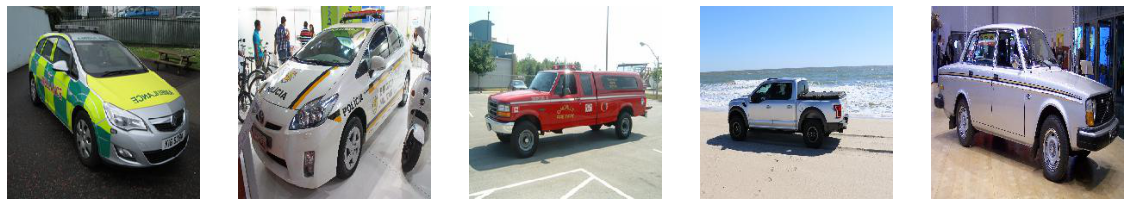

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

## 2. Pre-processing the data

![alt text](https://drive.google.com/uc?id=1qrMvsKOgTmo4Zt93r8G84Z5I_2IfVduq)

In [ ]:
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [ ]:
X.min(), X.max()

(0, 255)

In [ ]:
# normalize
X = X / X.max()

In [ ]:
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [ ]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [ ]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 6. Training the model

In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))




Train on 1646 samples, validate on 706 samples
Epoch 1/50





1646/1646 [==============================] - 10s 6ms/step - loss: 0.8274 - acc: 0.5510 - val_loss: 0.6717 - val_acc: 0.5751
Epoch 2/50
1646/1646 [==============================] - 1s 845us/step - loss: 0.6408 - acc: 0.6343 - val_loss: 0.6258 - val_acc: 0.6558
Epoch 3/50
1646/1646 [==============================] - 1s 854us/step - loss: 0.6439 - acc: 0.6324 - val_loss: 0.6767 - val_acc: 0.5793
Epoch 4/50
1646/1646 [==============================] - 1s 855us/step - loss: 0.6149 - acc: 0.6744 - val_loss: 0.5982 - val_acc: 0.6898
Epoch 5/50
1646/1646 [==============================] - 1s 839us/step - loss: 0.6083 - acc: 0.6659 - val_loss: 0.6046 - val_acc: 0.6657
Epoch 6/50
1646/1646 [==============================] - 1s 844us/step - loss: 0.6052 - acc: 0.6841 - val_loss: 0.5859 - val_acc: 0.6884
Epoch 7/50
1646/1646 [==============================] - 1s 861us/step - loss: 0.6067 - acc: 0.6738 - val_loss: 0.6513 - val_acc: 0

## 7. Evaluating model performance

In [ ]:
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.5835694050991501 %


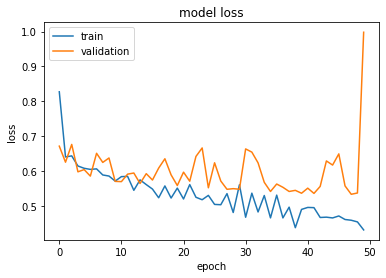

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 60


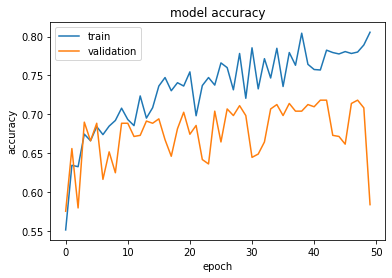

In [ ]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is 4 % sure that it is emergency
And actual class is  0


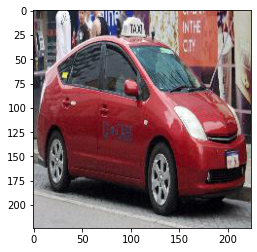

In [ ]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]
img = plt.imread('Dataset/images/' + img_name)
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])
plt.imshow(img)

# Hyperparameter tuning of neural networks

<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>

### 1. Changing activation function of hidden layer

In [ ]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 2s 1ms/step - loss: 5.2866 - acc: 0.5583 - val_loss: 0.6797 - val_acc: 0.5609
Epoch 2/50
1646/1646 [==============================] - 1s 862us/step - loss: 0.6711 - acc: 0.5832 - val_loss: 0.6829 - val_acc: 0.5637
Epoch 3/50
1646/1646 [==============================] - 1s 862us/step - loss: 0.6558 - acc: 0.5863 - val_loss: 0.6517 - val_acc: 0.5609
Epoch 4/50
1646/1646 [==============================] - 1s 858us/step - loss: 0.6443 - acc: 0.5881 - val_loss: 0.6425 - val_acc: 0.5637
Epoch 5/50
1646/1646 [==============================] - 1s 859us/step - loss: 0.6363 - acc: 0.6166 - val_loss: 0.6429 - val_acc: 0.6544
Epoch 6/50
1646/1646 [==============================] - 1s 865us/step - loss: 0.6348 - acc: 0.6622 - val_loss: 0.6530 - val_acc: 0.5878
Epoch 7/50
1646/1646 [==============================] - 1s 858us/step - loss: 0.6213 - acc: 0.6689 - val_loss: 0.6372 - val_acc: 0.6190
Epo

In [ ]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7096317280453258 %


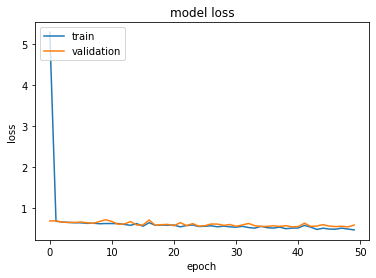

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 2. Increasing hidden neurons

In [ ]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              154141696 
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 154,142,721
Trainable params: 154,142,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 4s 2ms/step - loss: 1.4725 - acc: 0.5115 - val_loss: 0.6433 - val_acc: 0.6190
Epoch 2/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6381 - acc: 0.6458 - val_loss: 0.6395 - val_acc: 0.6246
Epoch 3/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.7006 - acc: 0.5820 - val_loss: 0.6206 - val_acc: 0.6473
Epoch 4/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6586 - acc: 0.6185 - val_loss: 0.6410 - val_acc: 0.6190
Epoch 5/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6490 - acc: 0.6312 - val_loss: 0.6546 - val_acc: 0.6048
Epoch 6/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.5994 - acc: 0.6756 - val_loss: 0.6247 - val_acc: 0.6431
Epoch 7/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6083 - acc: 0.6610 - val_loss: 0.5837 - val_acc: 0.6827
Epoch 8/50
1646

In [ ]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.623229461756374 %


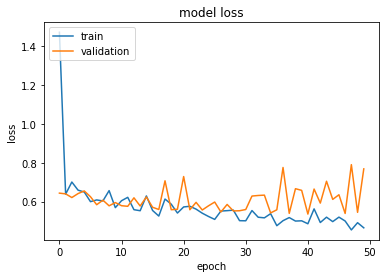

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 3. Increasing hidden layers

In [ ]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.7202 - acc: 0.5030 - val_loss: 0.6884 - val_acc: 0.5538
Epoch 2/50
1646/1646 [==============================] - 2s 947us/step - loss: 0.6787 - acc: 0.5832 - val_loss: 0.6850 - val_acc: 0.5552
Epoch 3/50
1646/1646 [==============================] - 2s 957us/step - loss: 0.6747 - acc: 0.5826 - val_loss: 0.6811 - val_acc: 0.5552
Epoch 4/50
1646/1646 [==============================] - 2s 940us/step - loss: 0.6705 - acc: 0.5814 - val_loss: 0.6758 - val_acc: 0.5595
Epoch 5/50
1646/1646 [==============================] - 2s 958us/step - loss: 0.6650 - acc: 0.5838 - val_loss: 0.6673 - val_acc: 0.5666
Epoch 6/50
1646/1646 [==============================] - 2s 944us/step - loss: 0.6597 - acc: 0.5960 - val_loss: 0.6629 - val_acc: 0.5694
Epoch 7/50
1646/1646 [==============================] - 2s 952us/step - loss: 0.6544 - acc: 0.6039 - val_loss: 0.6571 - val_acc: 0.6020
Epo

In [ ]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.6926345609065155 %


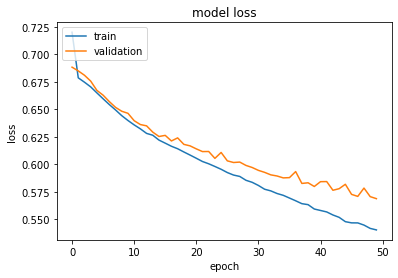

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 4. Increasing number of epochs

In [ ]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.7837 - acc: 0.5996 - val_loss: 0.6375 - val_acc: 0.6629
Epoch 2/100
1646/1646 [==============================] - 2s 926us/step - loss: 0.6429 - acc: 0.6349 - val_loss: 0.7056 - val_acc: 0.5623
Epoch 3/100
1646/1646 [==============================] - 2s 946us/step - loss: 0.6287 - acc: 0.6598 - val_loss: 0.7383 - val_acc: 0.5637
Epoch 4/100
1646/1646 [==============================] - 2s 930us/step - loss: 0.6369 - acc: 0.6470 - val_loss: 0.6210 - val_acc: 0.6516
Epoch 5/100
1646/1646 [==============================] - 2s 963us/step - loss: 0.6112 - acc: 0.6798 - val_loss: 0.5957 - val_acc: 0.6841
Epoch 6/100
1646/1646 [==============================] - 2s 930us/step - loss: 0.5936 - acc: 0.6896 - val_loss: 0.5911 - val_acc: 0.6827
Epoch 7/100
1646/1646 [==============================] - 2s 956us/step - loss: 0.6116 - acc: 0.6756 - val_loss: 0.6618 - val_acc: 0.5

In [ ]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7422096317280453 %


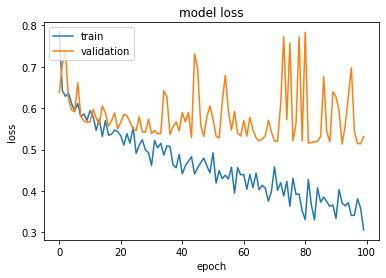

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 5. Changing the optimizer

In [ ]:
from keras.optimizers import Adam

In [ ]:
adam = Adam(lr=1e-5)

In [ ]:
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6765 - acc: 0.5936 - val_loss: 0.6585 - val_acc: 0.6431
Epoch 2/100
1646/1646 [==============================] - 2s 944us/step - loss: 0.6450 - acc: 0.6501 - val_loss: 0.6314 - val_acc: 0.6671
Epoch 3/100
1646/1646 [==============================] - 2s 968us/step - loss: 0.6273 - acc: 0.6610 - val_loss: 0.6205 - val_acc: 0.6686
Epoch 4/100
1646/1646 [==============================] - 2s 945us/step - loss: 0.6141 - acc: 0.6738 - val_loss: 0.6117 - val_acc: 0.6856
Epoch 5/100
1646/1646 [==============================] - 2s 974us/step - loss: 0.6057 - acc: 0.6926 - val_loss: 0.6148 - val_acc: 0.6671
Epoch 6/100
1646/1646 [==============================] - 2s 953us/step - loss: 0.5943 - acc: 0.7060 - val_loss: 0.6042 - val_acc: 0.6756
Epoch 7/100
1646/1646 [==============================] - 2s 962us/step - loss: 0.5849 - acc: 0.7126 - val_loss: 0.5945 - val_acc: 0.6

In [ ]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7209631728045326 %


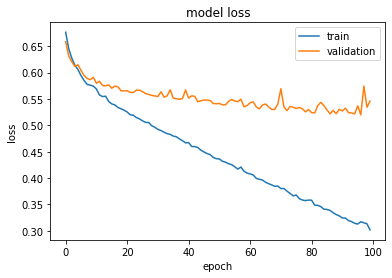

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

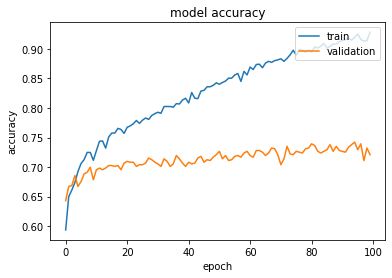

In [ ]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()